## Finding Key Connectors

In [4]:
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt

In [5]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klevin" }
]

In [6]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [7]:
# Initialize the dict with an empty list for each user id:
friendships = {user["id"]: [] for user in users}

In [8]:
# And loop over the friendship pairs to populate it:
for i, j in friendship_pairs:
    friendships[i].append(j)  # Add j as a friend of user i
    friendships[j].append(i)  # Add i as a friend of user j

In [9]:
def number_of_friends(user):
    """How many friends does_user_have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

total_connections = sum(number_of_friends(user)
                       for user in users)  # 24

In [10]:
num_users = len(users)  # length of the users list
avg_connections = total_connections / num_users  #34 / 10 == 2.4

In [11]:
# Creat a list (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user))
                    for user in users]

In [12]:
num_friends_by_id.sort(  # Sort the list
key=lambda id_and_friends: id_and_friends[1],  # by num_friends
    reverse=True)  #largest to smallest

In [13]:
# Each pair is (user_id, num_friends):
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
# (0, 2), (4, 2), (6, 2), (6, 2), (7, 2), (9, 1)]

## Data Scientists You May Know

In [14]:
def foaf_ids_bad(user):
    """foaf is short for "friend of a friend" """
    return [foaf_id
           for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id]]

In [15]:
print(friendships[0])  # [1, 2]
print(friendships[1])  # [0, 2, 3]
print(friendships[2])  # [0, 1, 3]

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [16]:
from collections import Counter  # not loaded by default

def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]  # For each of my friends,
        for foaf_id in friendships[friend_id]  # find their friends
        if foaf_id != user_id  #who aren't me
        and foaf_id not in friendships[user_id] #  and aren't my friends.
    )

print(friends_of_friends(users[3]))  # Counter({0: 2, 5: 1})

Counter({0: 2, 5: 1})


In [17]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodel"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "propbability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artifical intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [18]:
# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [19]:
# Keys are user_ids, values are lists of interests for that user_id.
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [20]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )

## Salaries and Experience

In [21]:
salaries_and_tenures = [
    (83000, 8.7), (88000, 8.1),
    (48000, 0.7), (76000, 6),
    (69000, 6.5), (76000, 7.5),
    (60000, 2.5), (83000, 10),
    (48000, 1.9), (63000, 4.2)]


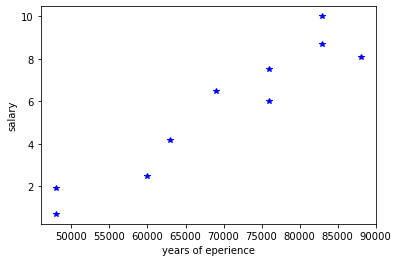

In [22]:
# Plot salary vs. experience
plt.plot([s[0] for s in salaries_and_tenures],
         [s[1] for s in salaries_and_tenures],
         'b*')
plt.ylabel('salary')
plt.xlabel('years of eperience')
plt.show()

In [23]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less then two"
    elif tenure < 5:
        return "between two and five"
    else: 
        return "more than five"

In [24]:
# keys are years, values are lists of the salaries for each tenure
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [25]:
# Keys are tenure buckets, values are average salary for that bucket.
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [26]:
print(average_salary_by_bucket)

{'more than five': 79166.66666666667, 'less then two': 48000.0, 'between two and five': 61500.0}


## Topics of Interest

In [27]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodel"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "propbability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artifical intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [28]:
words_and_counts = Counter(word
                         for user, interest in interests
                         for word in interest.lower().split())

In [29]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
machine 2
neural 2
networks 2
